In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import sys
sys.path.append("../scripts")
from train_model import train_model
from data_preprocessing import X_test, y_test

Loading data...
Handling missing values...
Removing outliers from key features...
Encoding categorical variables...
Scaling numerical features...
Splitting the data into training and testing sets...
Preprocessing complete!


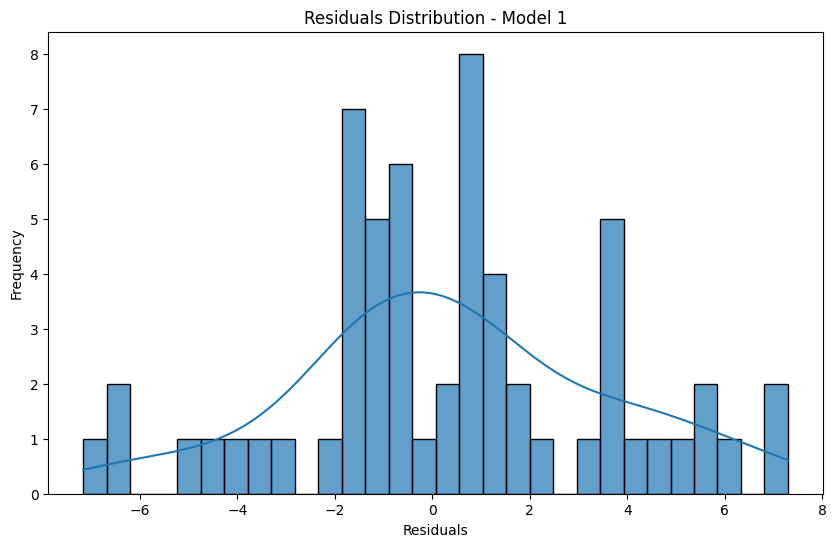

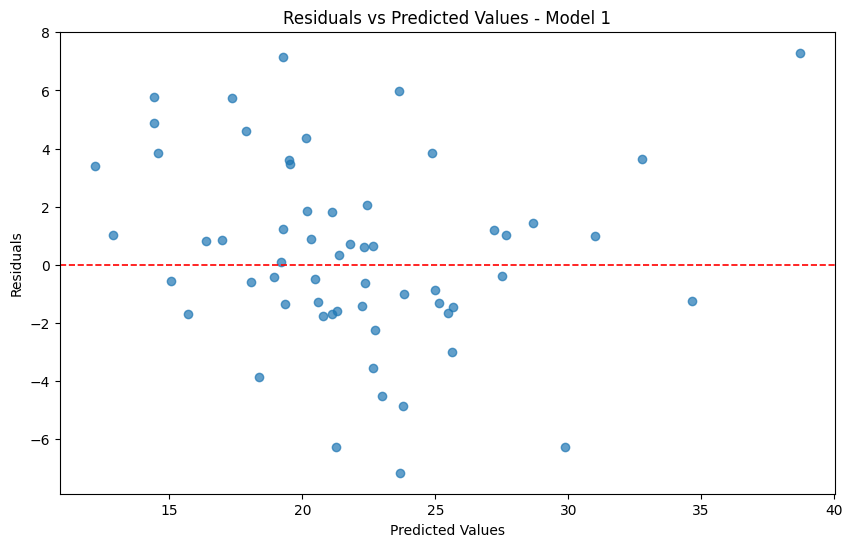

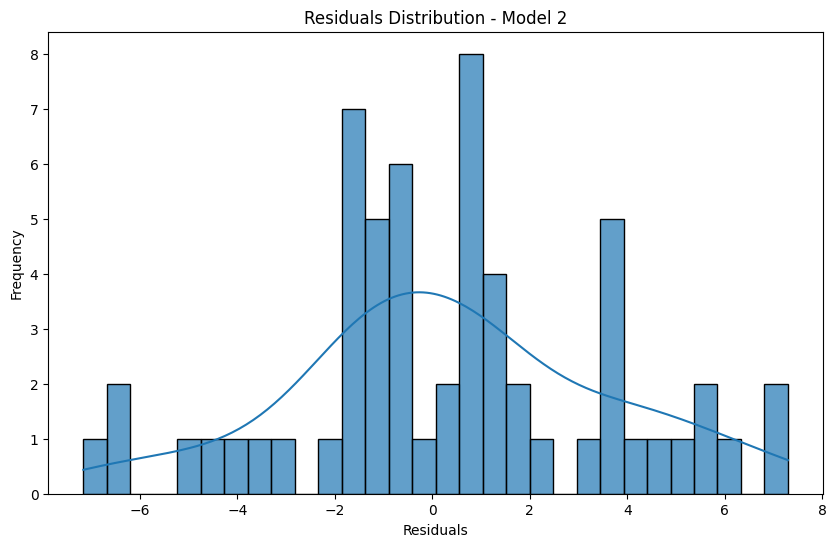

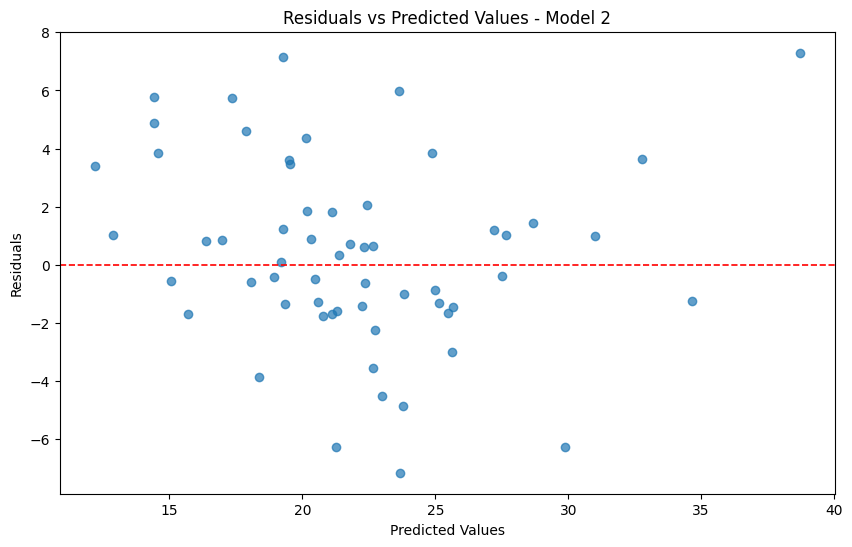

     Model        MSE        R2
0  Model_1  10.445192  0.675251
1  Model_2  10.445192  0.675251


In [7]:

# Compare models with different feature sets or preprocessing steps
def compare_models(models, X_test_list, y_test):
    """
    Compare the performance of multiple models with different feature sets or preprocessing steps.
    Args:
        models (list): List of trained models.
        X_test_list (list): List of test datasets corresponding to each model.
        y_test (array): True labels for the test dataset.
    """
    results = []
    for i, (model, X_test) in enumerate(zip(models, X_test_list)):
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": f"Model_{i+1}", "MSE": mse, "R2": r2})

        # Plot residuals for each model
        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=30, alpha=0.7)
        plt.title(f"Residuals Distribution - Model {i+1}")
        plt.xlabel("Residuals")
        plt.ylabel("Frequency")
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.scatter(y_pred, residuals, alpha=0.7)
        plt.axhline(0, color='red', linestyle='--', linewidth=1.2)
        plt.title(f"Residuals vs Predicted Values - Model {i+1}")
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.show()

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

# Example: Training two models with different feature sets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load preprocessed data (modify this to use different feature sets or preprocessing)
from data_preprocessing import preprocess_data

# Define file paths for the original dataset
file_path = '../data/boston_housing.csv'

# Preprocess with original features
X_train1, X_test1, y_train, y_test = preprocess_data(file_path, target_column="medv")

# Preprocess with scaled features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train1)
X_test2 = scaler.transform(X_test1)

# Train two models
model1 = LinearRegression().fit(X_train1, y_train)
model2 = LinearRegression().fit(X_train2, y_train)

# Compare performance of both models
models = [model1, model2]
X_test_list = [X_test1, X_test2]
comparison_results = compare_models(models, X_test_list, y_test)
